[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_10174/2999361435.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_lim, y_lim, "k-", color="r", label="45 degree")


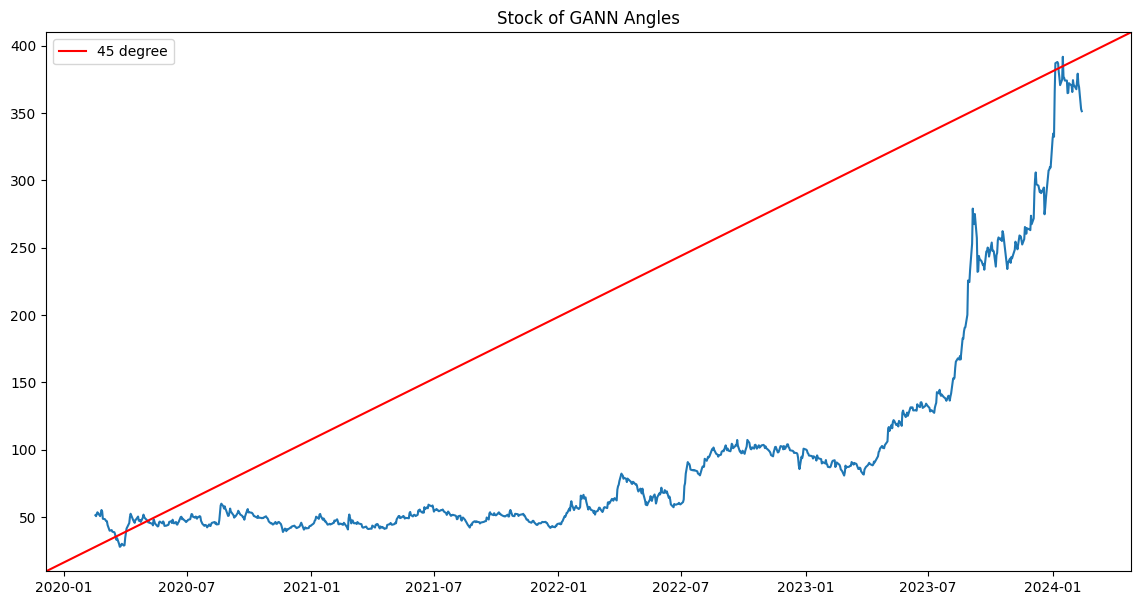

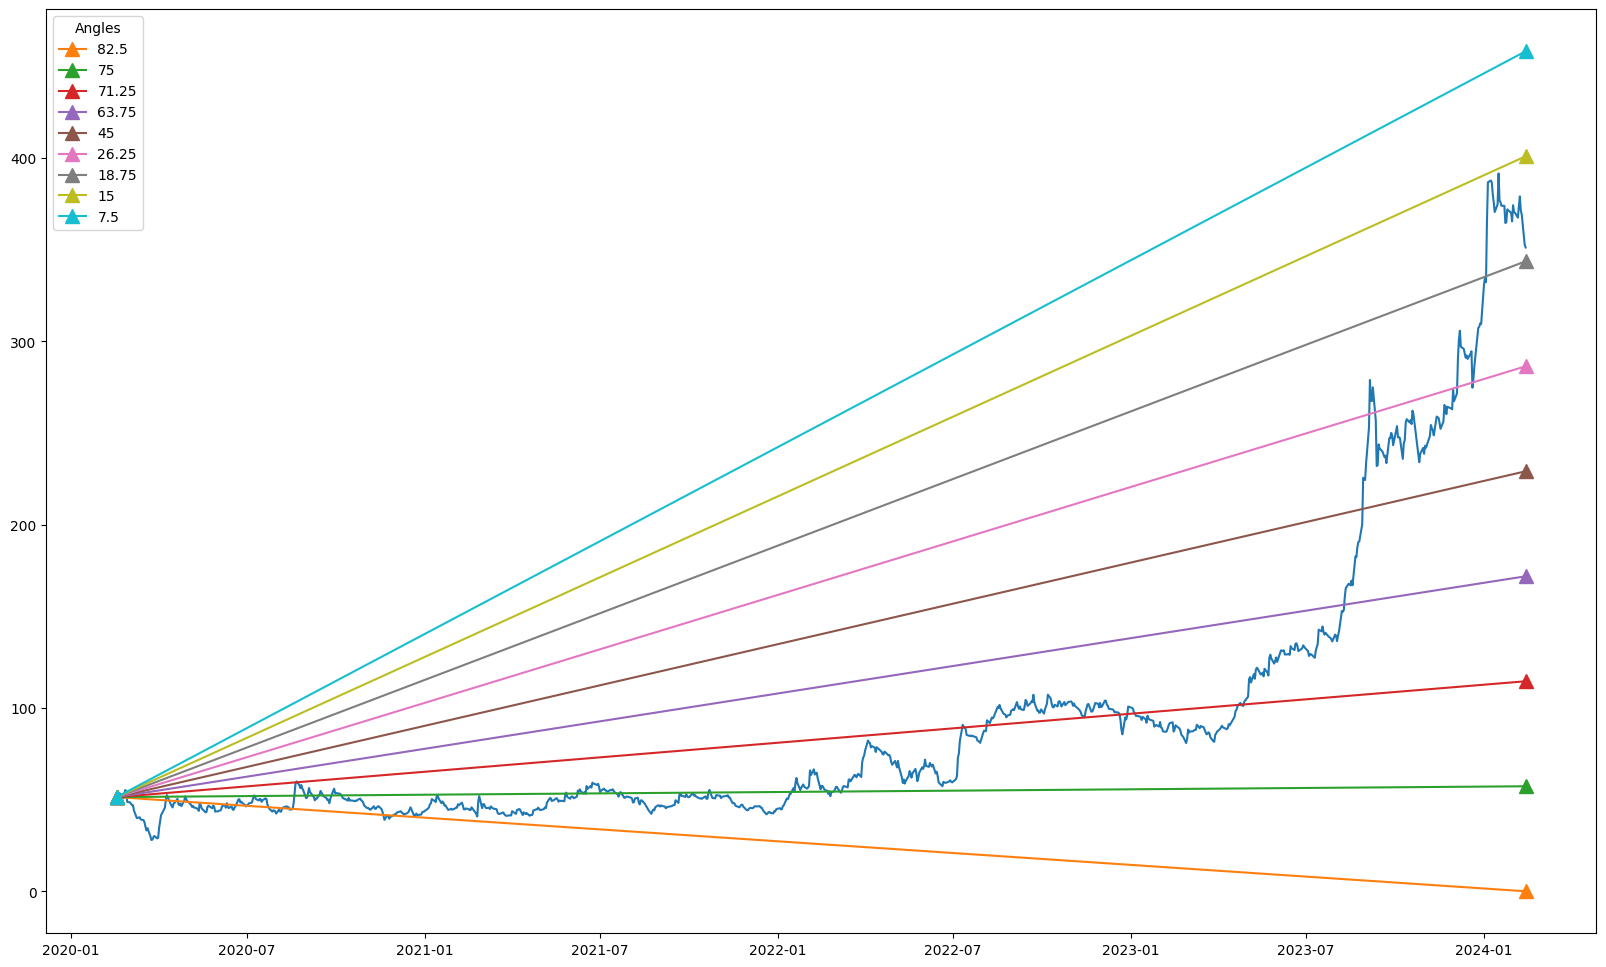

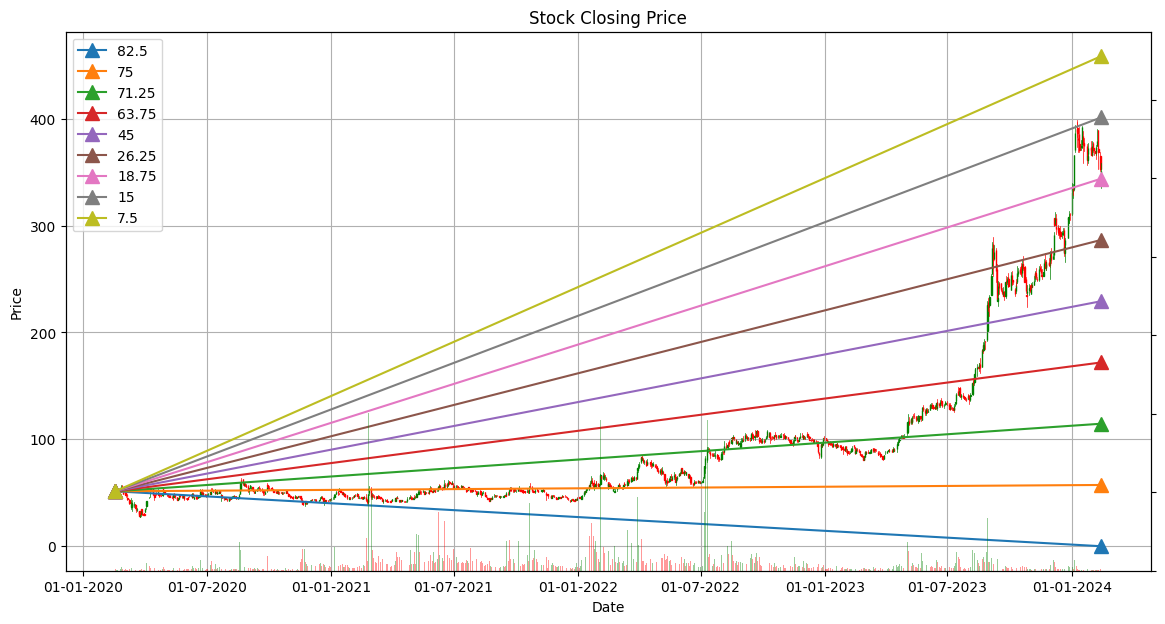

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import yfinance as yf
import datetime as dt
yf.pdr_override()

# input
symbol = "HSCL.NS"
start = dt.date.today() - dt.timedelta(days=365 * 4)
end = dt.date.today()

# Read data
df = yf.download(symbol, start, end)

# Line Chart
plt.figure(figsize=(14, 7))
plt.plot(df["Adj Close"])
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, "k-", color="r", label="45 degree")
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.title("Stock of GANN Angles")
plt.legend(loc="best")
plt.show()

import math

angles = [82.5, 75, 71.25, 63.75, 45, 26.25, 18.75, 15, 7.5]
# radians = [0,7.5,15,18.5,26.25,45,63.75,71.25,75,82.5,90]
radians = [
    0.1309,
    0.261799,
    0.3228859,
    0.45814893,
    0.785398,
    1.1126474,
    1.2435471,
    1.309,
    1.439897,
]
# math.degrees(angles)
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(df.index, df["Adj Close"])

x_0 = 0
y_0 = 0

for i in range(len(radians)):
    ax.plot(
        [df.index[0], df.index[-1]],
        [df["Adj Close"][0], math.degrees(math.radians(i) * (180 / math.pi))],
        marker="^",
        markersize=10,
        label=angles[i],
    )
    # ax.plot([df.index[0], df.index[-1]], [df['Adj Close'][0], math.degrees(i)], marker='^', markersize=10, label=angles[i])

plt.legend(title="Angles")
plt.show()

# ## Candlestick with GANN Lines Angles
from matplotlib import dates as mdates

df["VolumePositive"] = df["Open"] < df["Adj Close"]
dfc = df.dropna()
dfc = df.reset_index()
dfc["Date"] = mdates.date2num(dfc["Date"].tolist())
from mplfinance.original_flavor import candlestick_ohlc

# Plot Example Angle line
angles = [82.5, 75, 71.25, 63.75, 45, 26.25, 18.75, 15, 7.5]

# plot the points
fig = plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

candlestick_ohlc(ax, dfc.values, width=0.5, colorup="g", colordown="r", alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))
x_0 = 0
y_0 = 0

for i in range(len(angles)):
    ax.plot(
        [df.index[0], df.index[-1]],
        [df["Adj Close"][0], math.degrees(math.radians(i) * (180 / math.pi))],
        marker="^",
        markersize=10,
        label=angles[i],
    )

axv = ax.twinx()
colors = df.VolumePositive.map({True: "g", False: "r"})
axv.bar(dfc.Date, dfc["Volume"], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3 * dfc.Volume.max())
ax.grid(True)
ax.set_title("Stock Closing Price")
ax.set_ylabel("Price")
ax.set_xlabel("Date")
ax.legend(loc="best")
plt.show()

[*********************100%%**********************]  1 of 1 completed
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


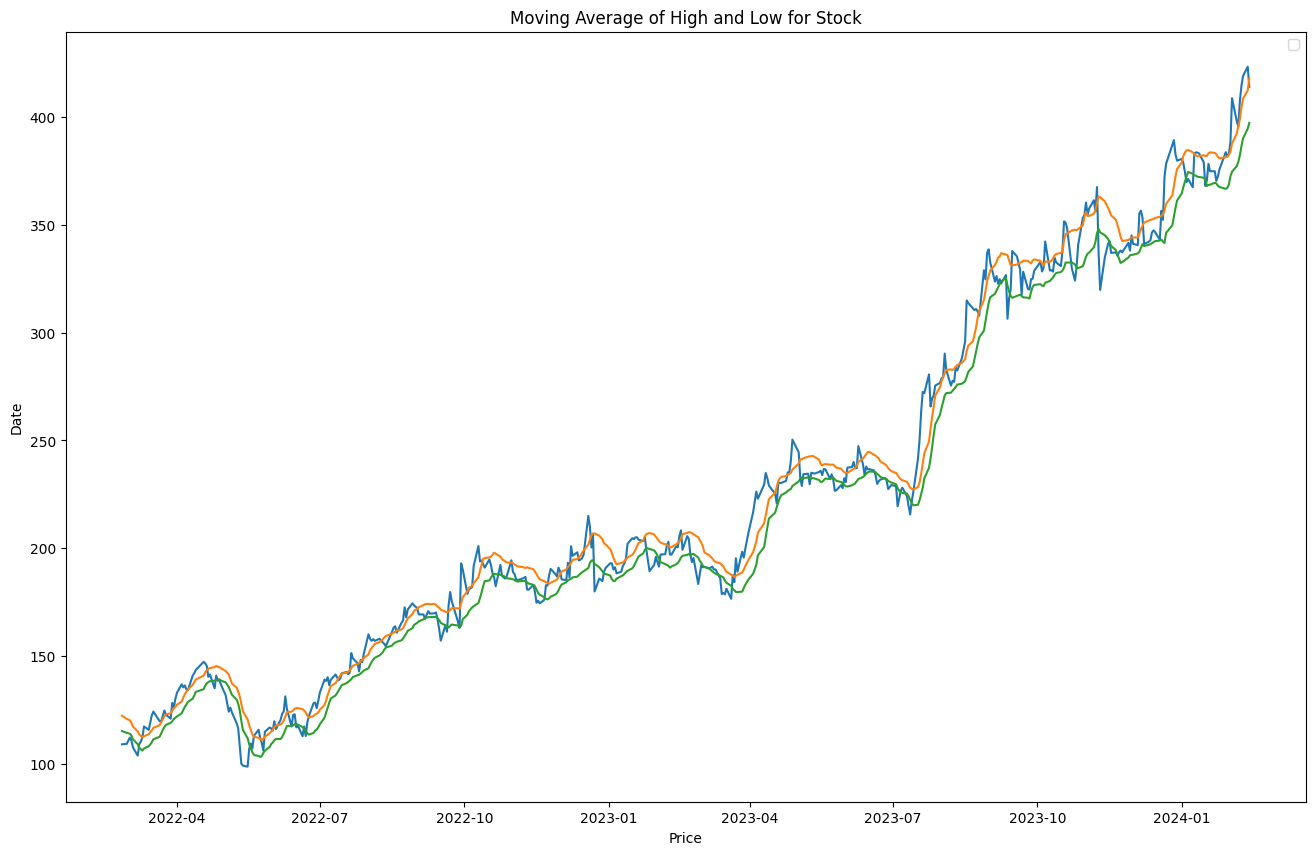

/tmp/ipykernel_10174/3756771768.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["VolumePositive"] = df["Open"] < df["Adj Close"]


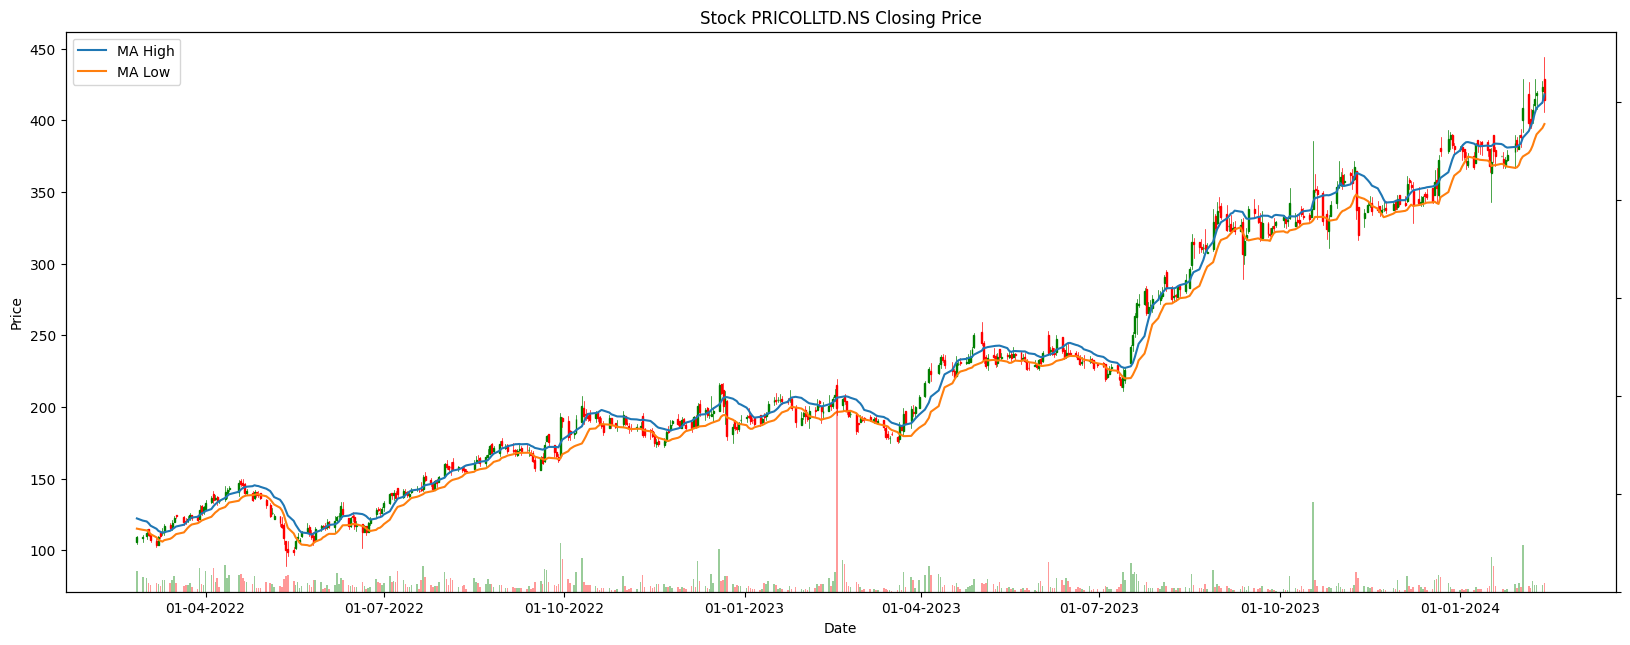

In [2]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
yf.pdr_override()

# input
symbol = "PRICOLLTD.NS"
start = dt.date.today() - dt.timedelta(days=365 * 2)
end = dt.date.today()

# Read data
df = yf.download(symbol, start, end)

df["MA_High"] = df["High"].rolling(10).mean()
df["MA_Low"] = df["Low"].rolling(10).mean()
df = df.dropna()

plt.figure(figsize=(16, 10))
plt.plot(df["Adj Close"])
plt.plot(df["MA_High"])
plt.plot(df["MA_Low"])
plt.title("Moving Average of High and Low for Stock")
plt.legend(loc="best")
plt.xlabel("Price")
plt.ylabel("Date")
plt.show()

# # Candlestick with Moving Averages High and Low
from matplotlib import dates as mdates

df["VolumePositive"] = df["Open"] < df["Adj Close"]
df = df.dropna()
df = df.reset_index()
df["Date"] = mdates.date2num(df["Date"].tolist())

from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(20, 16))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1, df.values, width=0.5, colorup="g", colordown="r", alpha=1.0)
ax1.plot(df.Date, df["MA_High"], label="MA High")
ax1.plot(df.Date, df["MA_Low"], label="MA Low")
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))
# ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: "g", False: "r"})
ax1v.bar(df.Date, df["Volume"], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3 * df.Volume.max())
ax1.set_title("Stock " + symbol + " Closing Price")
ax1.set_ylabel("Price")
ax1.set_xlabel("Date")
ax1.legend(loc="best")
plt.show()

[*********************100%%**********************]  1 of 1 completed
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


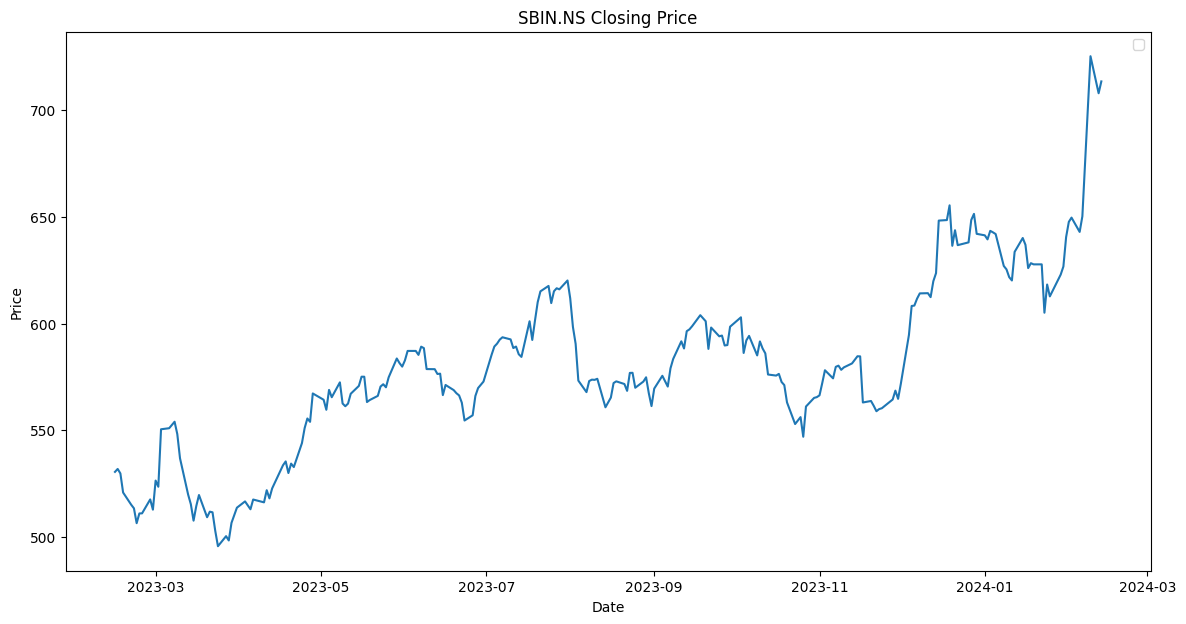

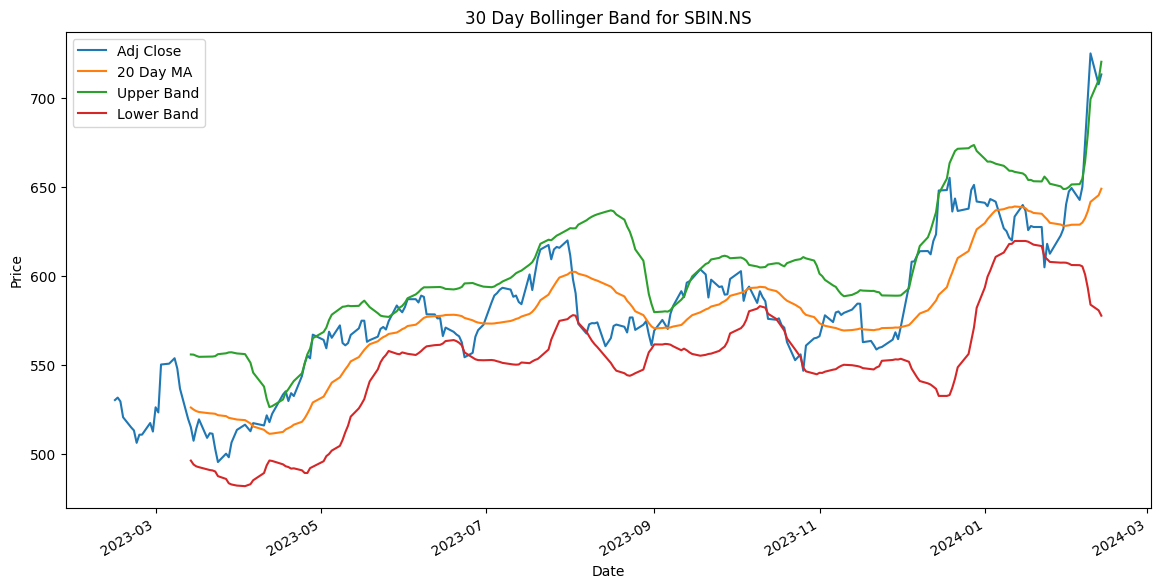

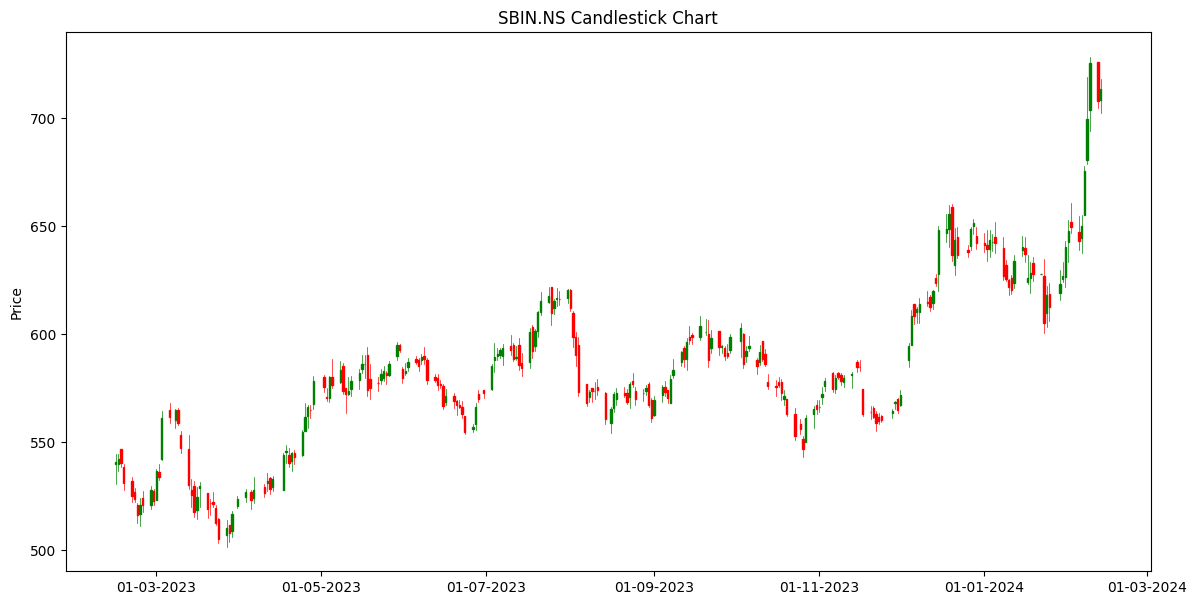

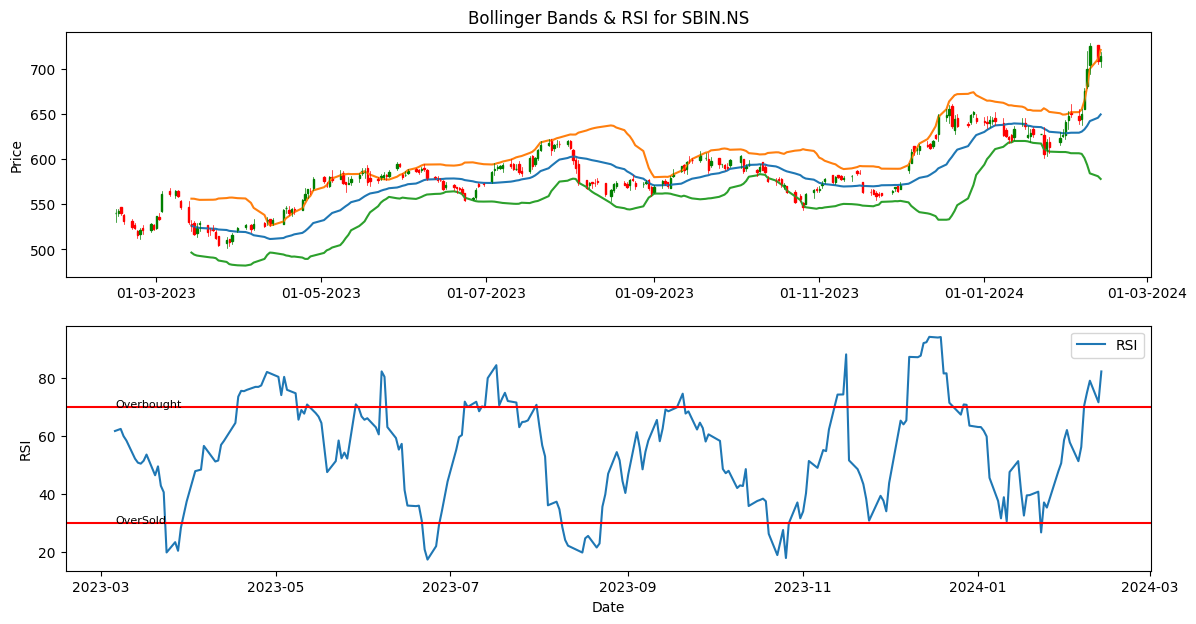

In [10]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
yf.pdr_override()
from pylab import rcParams
import sys
import os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
import Utils.ta_functions as ta



# input
symbol = "SBIN.NS"
start = dt.date.today() - dt.timedelta(days=365 * 1)
end = dt.date.today()

# Read data
df = yf.download(symbol, start, end)

# Simple Line Chart
plt.figure(figsize=(14, 7))
plt.plot(df["Adj Close"])
plt.legend(loc="best")
plt.title(symbol + " Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# ## RSI
rsi = ta.RSI(df["Adj Close"], timeperiod=14)
rsi = rsi.dropna()

# ## Bollinger Bands
# Create Bollinger Band
# https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:bollinger_bands
df["20 Day MA"] = df["Adj Close"].rolling(window=20).mean()
df["20 Day STD"] = df["Adj Close"].rolling(window=20).std()
df["Upper Band"] = df["20 Day MA"] + (df["20 Day STD"] * 2)
df["Lower Band"] = df["20 Day MA"] - (df["20 Day STD"] * 2)

df[["Adj Close", "20 Day MA", "Upper Band", "Lower Band"]].plot(figsize=(14, 7))
plt.title(f"30 Day Bollinger Band for {symbol.upper()}")
plt.ylabel("Price")
plt.legend(loc="best")
plt.show()

dfc = df.copy()
dfc = dfc.reset_index()

from matplotlib import dates as mdates

dfc["Date"] = mdates.date2num(dfc["Date"].tolist())

# This one has not date and is convert to number
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14, 7))
ax = plt.subplot(1, 1, 1)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))
candlestick_ohlc(ax, dfc.values, width=0.5, colorup="g", colordown="r", alpha=1.0)
plt.title(f"{symbol.upper()} Candlestick Chart")
plt.ylabel("Price")
plt.show()

# ## Combine RSI and Bollinger Bands
rcParams["figure.figsize"] = 14, 7
ax = plt.subplot(211)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))
plt.plot(
    df[["20 Day MA", "Upper Band", "Lower Band"]],
    label=("20 Day MA", "Upper Band", "Lower Band"),
)
candlestick_ohlc(ax, dfc.values, width=0.5, colorup="g", colordown="r", alpha=1.0)
plt.title(f"Bollinger Bands & RSI for {symbol.upper()}")
plt.ylabel("Price")

plt.subplot(212)
plt.plot(rsi, "-", label="RSI")
plt.text(s="Overbought", x=rsi.index[0], y=70, fontsize=8)
plt.text(s="OverSold", x=rsi.index[0], y=30, fontsize=8)
plt.axhline(y=70, color="r")
plt.axhline(y=30, color="r")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend(loc="best")
plt.show()

[*********************100%%**********************]  1 of 1 completed
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


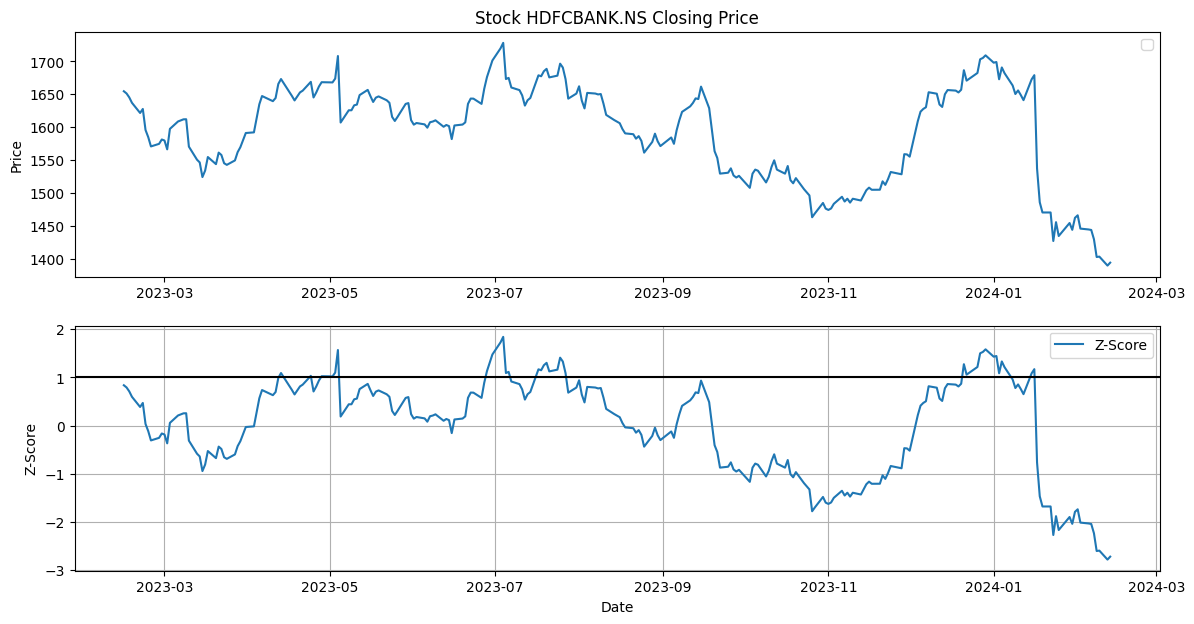

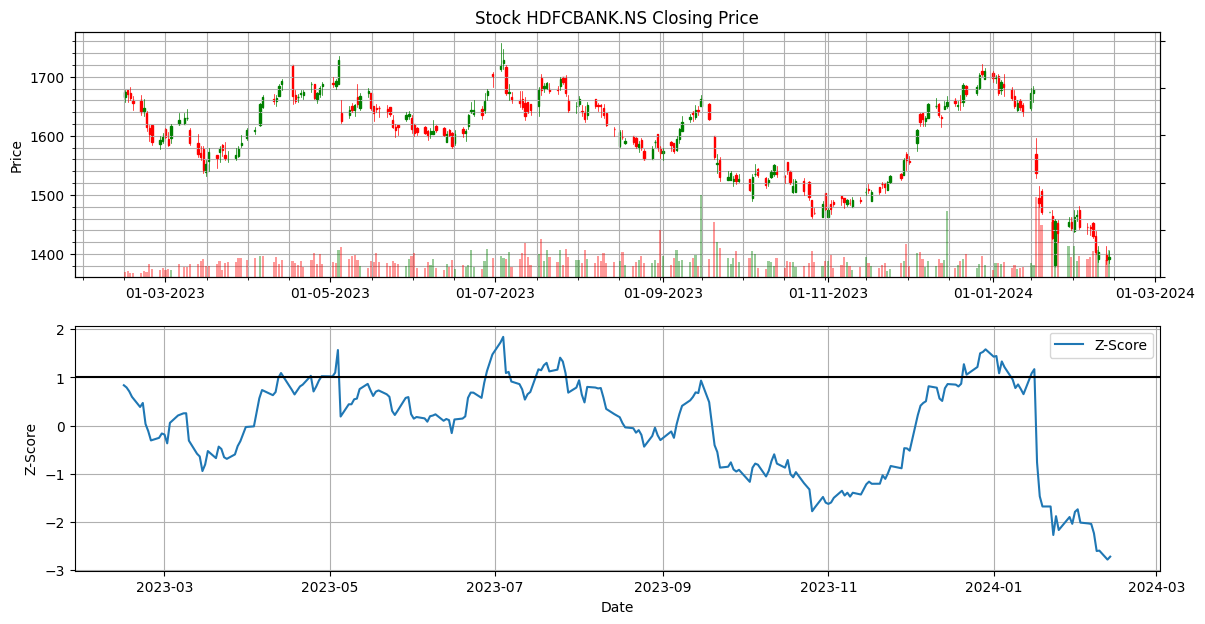

In [7]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
yf.pdr_override()

# input
symbol = "HDFCBANK.NS"
start = dt.date.today() - dt.timedelta(days=365)
end = dt.date.today()

# Read data
df = yf.download(symbol, start, end)

from scipy.stats import zscore

df["z_score"] = zscore(df["Adj Close"])

fig = plt.figure(figsize=(14, 7))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df["Adj Close"])
ax1.set_title("Stock " + symbol + " Closing Price")
ax1.set_ylabel("Price")
ax1.legend(loc="best")

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df["z_score"], label="Z-Score")
ax2.axhline(y=1, color="black")
ax2.grid()
ax2.legend(loc="best")
ax2.set_ylabel("Z-Score")
ax2.set_xlabel("Date")
plt.show()

# ## Candlestick with Z-Score
from matplotlib import dates as mdates

dfc = df.copy()
dfc["VolumePositive"] = dfc["Open"] < dfc["Adj Close"]
# dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc["Date"] = pd.to_datetime(dfc["Date"])
dfc["Date"] = dfc["Date"].apply(mdates.date2num)

from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14, 7))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1, dfc.values, width=0.5, colorup="g", colordown="r", alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))
ax1.grid(True, which="both")
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: "g", False: "r"})
ax1v.bar(dfc.Date, dfc["Volume"], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3 * df.Volume.max())
ax1.set_title("Stock " + symbol + " Closing Price")
ax1.set_ylabel("Price")

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df["z_score"], label="Z-Score")
ax2.axhline(y=1, color="black")
ax2.grid()
ax2.legend(loc="best")
ax2.set_ylabel("Z-Score")
ax2.set_xlabel("Date")
plt.show()

[*********************100%%**********************]  1 of 1 completed


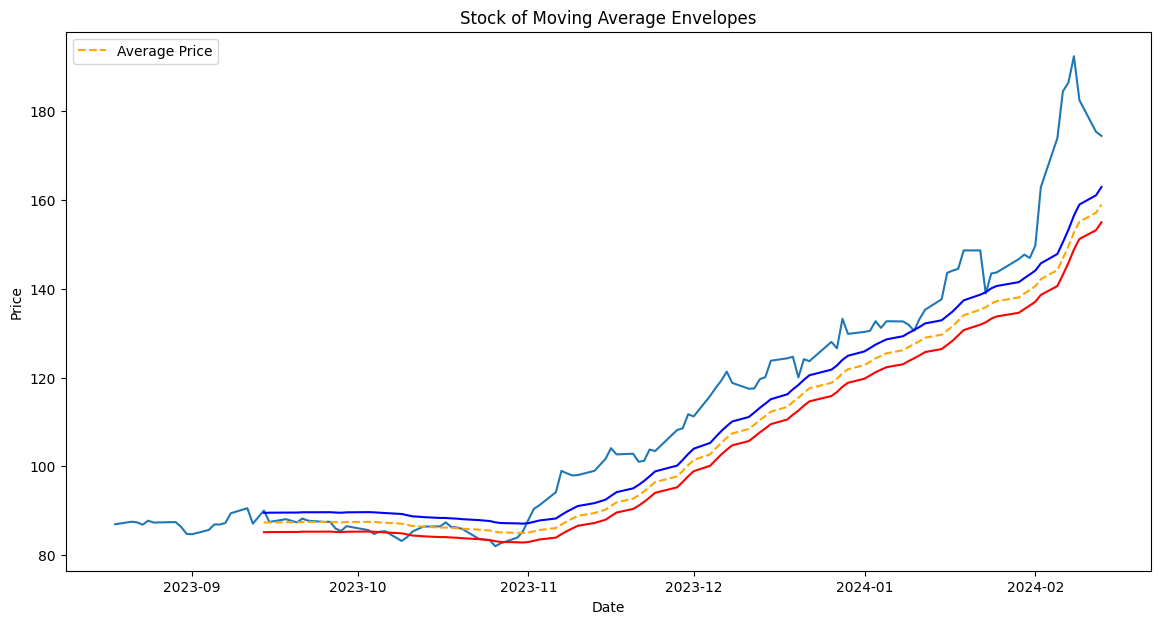

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


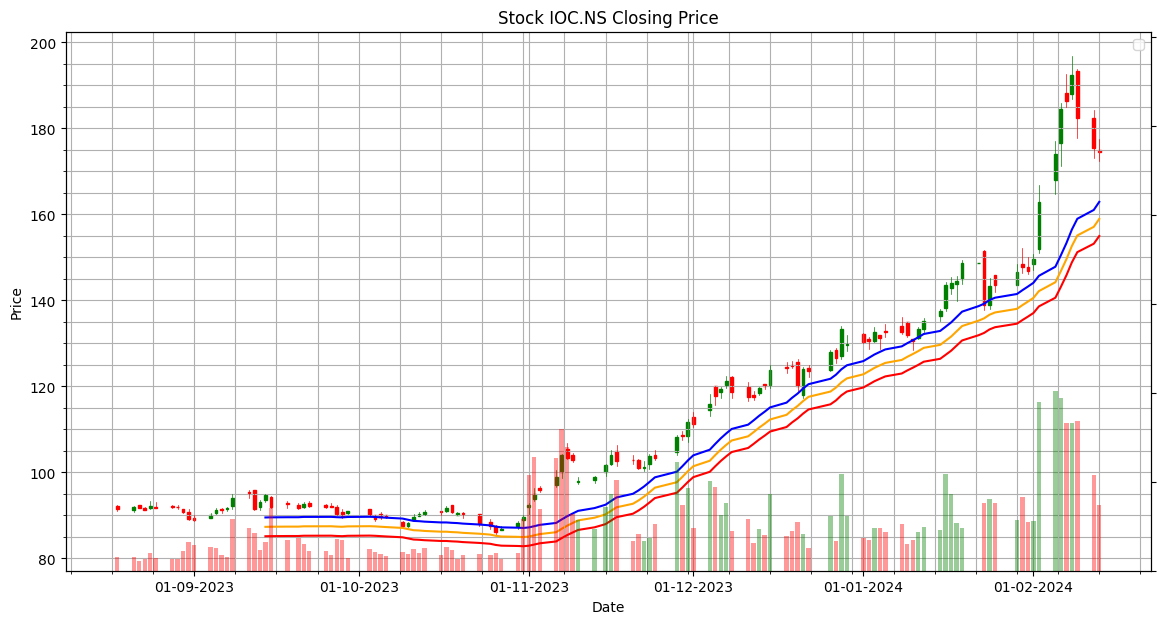

In [9]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
yf.pdr_override()
import sys
import os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
import Utils.ta_functions as ta

# input
symbol = "IOC.NS"
start = dt.date.today() - dt.timedelta(days=180)
end = dt.date.today()

# Read data
df = yf.download(symbol, start, end)

df["20SMA"] = ta.SMA(df["Adj Close"], timeperiod=20)
df["Upper_Envelope"] = df["20SMA"] + (df["20SMA"] * 0.025)
df["Lower_Envelope"] = df["20SMA"] - (df["20SMA"] * 0.025)

# Line Chart
plt.figure(figsize=(14, 7))
plt.plot(df["Adj Close"])
plt.plot(df["Upper_Envelope"], color="blue")
plt.plot(df["Lower_Envelope"], color="red")
plt.plot(
    df["Adj Close"].rolling(20).mean(),
    color="orange",
    label="Average Price",
    linestyle="--",
)
plt.title("Stock of Moving Average Envelopes")
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(loc="best")
plt.show()

# ## Candlestick with MAE
from matplotlib import dates as mdates

dfc = df.copy()
dfc["VolumePositive"] = dfc["Open"] < dfc["Adj Close"]
# dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc["Date"] = mdates.date2num(dfc["Date"].tolist())
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14, 7))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1, dfc.values, width=0.5, colorup="g", colordown="r", alpha=1.0)
ax1.plot(df["Upper_Envelope"], color="blue")
ax1.plot(df["Lower_Envelope"], color="red")
ax1.plot(df["Adj Close"].rolling(20).mean(), color="orange")
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))
ax1.grid(True, which="both")
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: "g", False: "r"})
ax1v.bar(dfc.Date, dfc["Volume"], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3 * df.Volume.max())
ax1.set_title("Stock " + symbol + " Closing Price")
ax1.legend(loc="best")
ax1.set_ylabel("Price")
ax1.set_xlabel("Date")
plt.show()